In [2]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


We'll continue to make use of the fuel economy dataset in this workspace.

In [3]:
df  = pd.read_csv('fuel-econ.csv')

### **Task 1**: 
Plot the distribution of combined fuel mileage (column 'comb', in miles per gallon) by manufacturer (column 'make'), for all manufacturers with at least eighty cars in the dataset. Consider which manufacturer order will convey the most information when constructing your final plot. 

**Hint**: Completing this exercise will take multiple steps! Add additional code cells as needed in order to achieve the goal.

In [4]:
filt = df.value_counts('make') >= 80
df.value_counts('make')[filt]

make
BMW              523
Mercedes-Benz    269
Porsche          235
Ford             218
Chevrolet        212
Audi             201
MINI             201
Volkswagen       174
Hyundai          158
Dodge            140
Lexus            125
Kia              124
Cadillac         118
Toyota           116
Infiniti         108
Honda            101
Jaguar            98
Mazda             87
Name: count, dtype: int64

In [5]:
manf_dict  = df.value_counts('make')[filt].to_dict()
manf_dict

{'BMW': 523,
 'Mercedes-Benz': 269,
 'Porsche': 235,
 'Ford': 218,
 'Chevrolet': 212,
 'Audi': 201,
 'MINI': 201,
 'Volkswagen': 174,
 'Hyundai': 158,
 'Dodge': 140,
 'Lexus': 125,
 'Kia': 124,
 'Cadillac': 118,
 'Toyota': 116,
 'Infiniti': 108,
 'Honda': 101,
 'Jaguar': 98,
 'Mazda': 87}

In [7]:
filt1 = df['make'].isin(df.value_counts('make')[filt].index)

In [8]:
data = df[filt1].copy()
data.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6


In [9]:
data['make'].map(manf_dict)

1       174
2       174
3       174
4       212
5       125
       ... 
3924    116
3925    158
3926    158
3927    125
3928    125
Name: make, Length: 3208, dtype: int64

In [10]:
data['manf_count'] = data['make'].map(manf_dict)
data.sort_values(by='manf_count',ascending=False,inplace=True)
data.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,manf_count
1362,34872,BMW,435i Gran Coupe,2015,Compact Cars,Rear-Wheel Drive,Automatic (S8),Premium Gasoline,6,3.0,...,92,21.0080,26.6629,31.3425,45.0816,24.6682,361,6,6,523
478,33080,BMW,M6 Gran Coupe,2013,Compact Cars,Rear-Wheel Drive,Automatic (AM-S7),Premium Gasoline,8,4.4,...,97,13.6755,16.8051,20.3928,28.2359,16.0554,552,3,3,523
472,33074,BMW,550i xDrive,2013,Midsize Cars,All-Wheel Drive,Automatic (S8),Premium Gasoline,8,4.4,...,102,15.7229,19.4941,23.9800,33.6143,18.6059,476,4,4,523
473,33075,BMW,M5,2013,Midsize Cars,Rear-Wheel Drive,Manual 6-spd,Premium Gasoline,8,4.4,...,102,14.6821,18.1212,21.5792,30.0000,17.1485,516,4,4,523
474,33076,BMW,M5,2013,Midsize Cars,Rear-Wheel Drive,Automatic (AM-S7),Premium Gasoline,8,4.4,...,102,13.6755,16.8051,20.3928,28.2359,16.0554,552,3,3,523


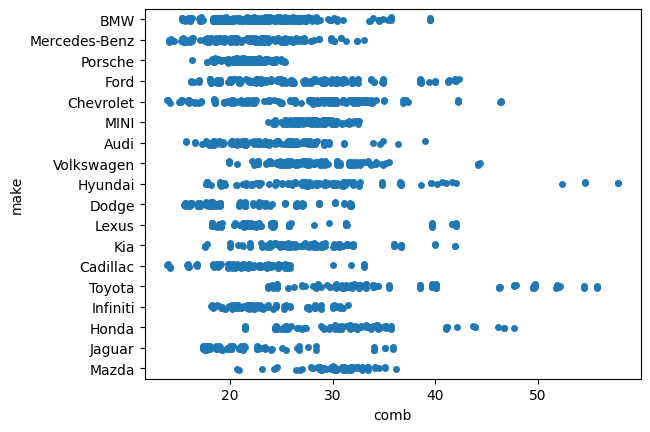

In [11]:
sb.stripplot(data = data,y = 'make',x = 'comb')
plt.show()

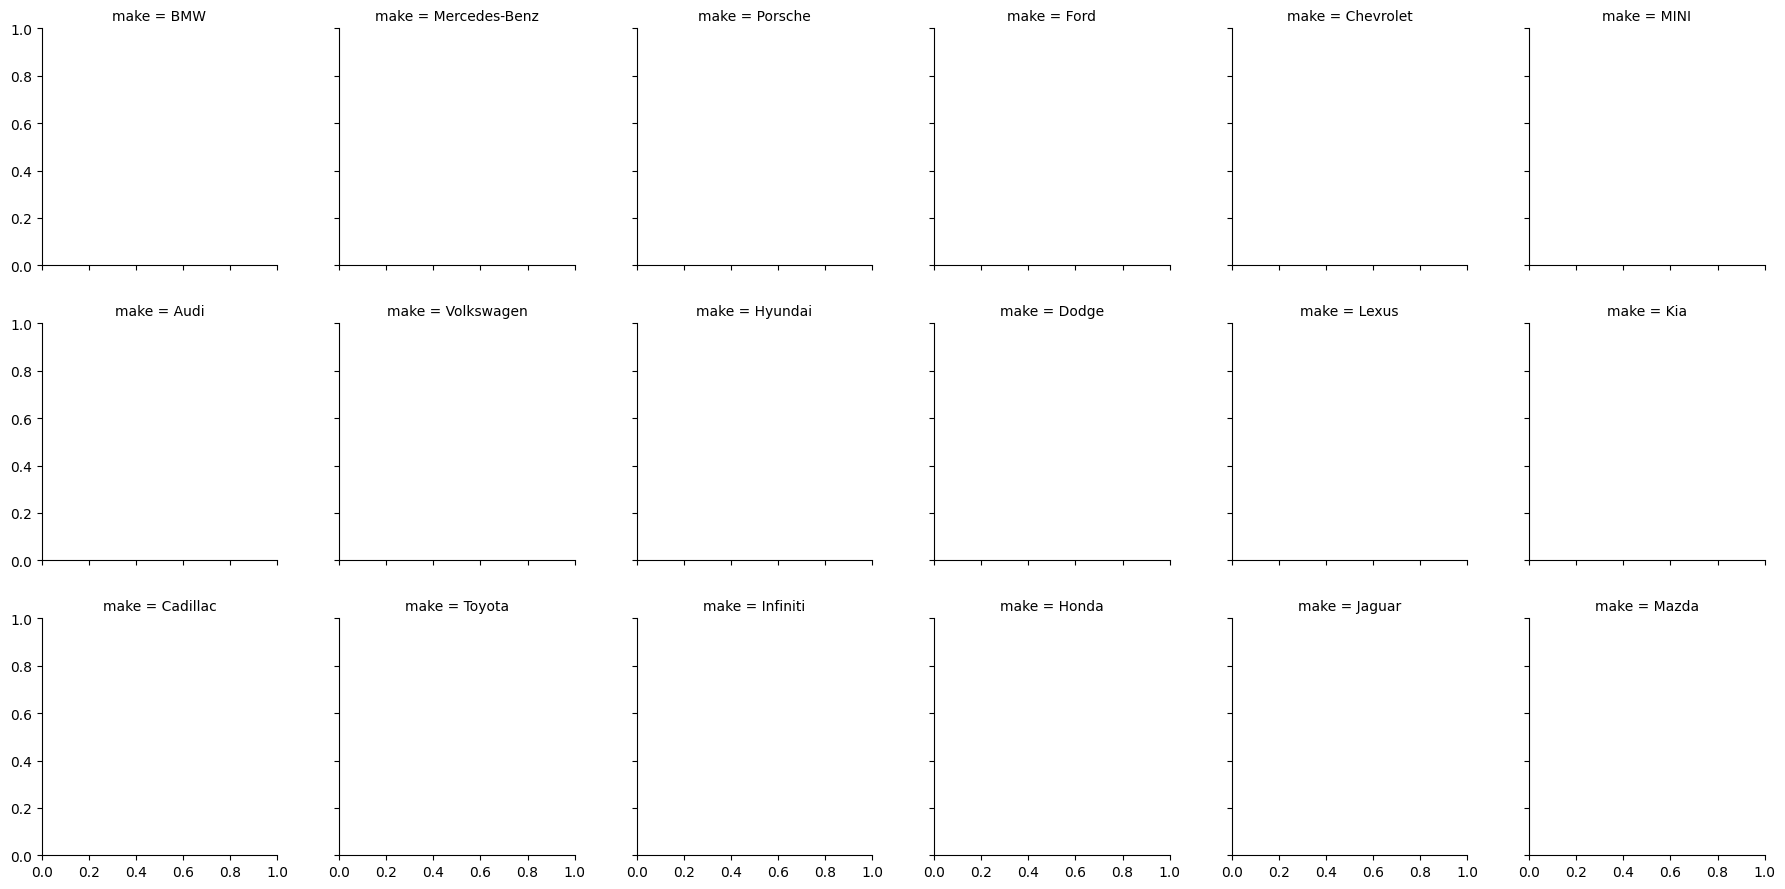

In [41]:
g = sb.FacetGrid(data.loc[: , ['make','comb']],col = 'make',col_wrap=6)

In [42]:
g.map_dataframe(sb.histplot,data = "comb")
g.set_ylabels("Fuel mileage")
g.savefig('Task1.png')

### **Task 2**: 
Continuing on from the previous task, plot the mean fuel efficiency for each manufacturer with at least 80 cars in the dataset.  Can you use error bars?

In [43]:
by_manf = data.groupby('make')

In [55]:
means = pd.DataFrame(by_manf['comb'].mean())
# means
means.sort_values(by = 'comb',ascending = False,inplace = True)
means

,comb
make,
Toyota,35.184424
Honda,31.588841
Mazda,30.397474
Hyundai,28.793620
Kia,27.843018
MINI,27.807288
Volkswagen,27.769875
Chevrolet,27.224809
Ford,26.796018


<Axes: xlabel='comb', ylabel='make'>

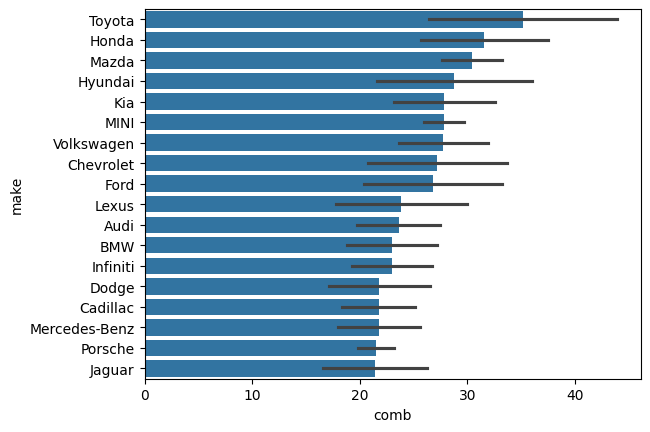

In [61]:
sb.barplot(x = data['comb'],y = data['make'],errorbar='sd',order = means.index)